# Introduction

In this micro-course, you'll learn all about **[pandas](https://pandas.pydata.org)**, the most popular Python library for data analysis.


In this tutorial, you will learn how to create your own data, along with how to work with data that already exists.  

# Getting started

To use pandas, you'll typically start with the following line of code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating data

There are two core objects in pandas: the **DataFrame** and the **Series**.

### DataFrame

A DataFrame is a table. It contains an array of individual *entries*, each of which has a certain *value*. Each entry corresponds to a row (or *record*) and a *column*.

For example, consider the following simple DataFrame:

In [4]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})
#shift tab to view doc

,Yes,No
0,50,131
1,21,2


In this example, the "0, No" entry has the value of 131. The "0, Yes" entry has a value of 50, and so on.

DataFrame entries are not limited to integers. For instance, here's a DataFrame whose values are strings:

In [6]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


We are using the `pd.DataFrame()` constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names (`Bob` and `Sue` in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

The dictionary-list constructor assigns values to the *column labels*, but just uses an ascending count from 0 (0, 1, 2, 3, ...) for the *row labels*. Sometimes this is OK, but oftentimes we will want to assign these labels ourselves.

The list of row labels used in a DataFrame is known as an **Index**. We can assign values to it by using an `index` parameter in our constructor:

In [8]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


### Series

A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:

In [12]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

A Series is, in essence, a single column of a DataFrame. So you can assign row labels to the Series the same way as before, using an `index` parameter. However, a Series does not have a column name, it only has one overall `name`:

In [14]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

The Series and the DataFrame are intimately related. It's helpful to think of a DataFrame as actually being just a bunch of Series "glued together". We'll see more of this in the next section of this tutorial.

# Reading data files

Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

Data can be stored in any of a number of different forms and formats. By far the most basic of these is the humble CSV file. When you open a CSV file you get something that looks like this:

```
Product A,Product B,Product C,
30,21,9,
35,34,1,
41,11,11
```

So a CSV file is a table of values separated by commas. Hence the name: "Comma-Separated Values", or CSV.

Let's now set aside our toy datasets and see what a real dataset looks like when we read it into a DataFrame. We'll use the `pd.read_csv()` function to read the data into a DataFrame. This goes thusly:

Dataset details
https://www.kaggle.com/competitions/titanic/data

In [18]:
titanic = pd.read_csv("train.csv")

We can use the `shape` attribute to check how large the resulting DataFrame is:

In [20]:
titanic.shape

(891, 12)

So our new DataFrame has 891 records split across 12 different columns. 

We can examine the contents of the resultant DataFrame using the `head()` command, which grabs the first five rows:

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
#Last 5 rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
#To see some statistics of the numeric columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
#To see what values are missing
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
#To find mean of a column
titanic['Age'].mean()

29.69911764705882

In [36]:
#To find out all unique values in a column
titanic['Pclass'].unique()

array([3, 1, 2])

In [38]:
#Number of unique values in a column
titanic['Pclass'].nunique()

3

In [40]:
#Frequency of each unique value
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
#correlation between numeric columns
titanic.select_dtypes(include="number").corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Graphs in Pandas

<Axes: >

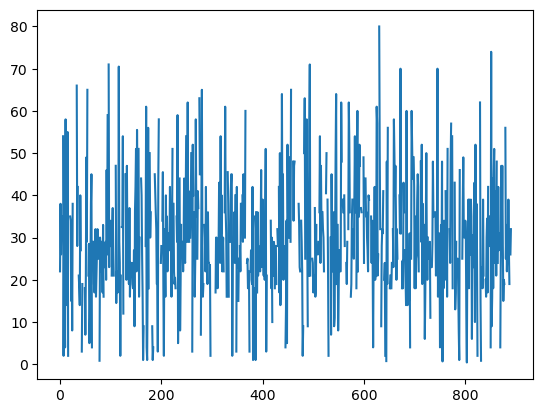

In [44]:
titanic['Age'].plot()  #Line graph of Age for all rows

<Axes: xlabel='Survived', ylabel='Fare'>

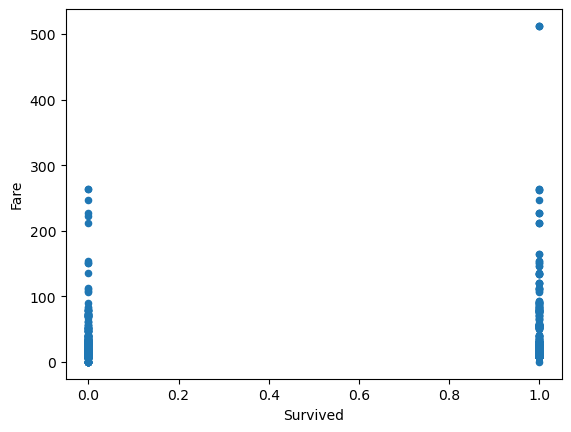

In [46]:
titanic.plot.scatter(x='Survived', y='Fare')